# Task
Tell me about this dataset.

Here is all the data you need:
"ecommerce_customer_dataset.xlsx"

import pandas as pd

df=pd.read_csv("ecommerce_customer_dataset - ecommerce_customer_dataset.csv")
print(df.head())

In [15]:
import pandas as pd

df = pd.read_csv("ecommerce_customer_dataset - ecommerce_customer_dataset.csv")
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'ecommerce_customer_dataset - ecommerce_customer_dataset.csv'

## Data loading

### Subtask:
Load the ecommerce customer dataset into a pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_excel('ecommerce_customer_dataset.xlsx')
display(df.head())

Customer_ID   Age Gender  Annual_Income  Spending_Score  \
0            1  56.0   Male        71663.0            96.0   
1            2  69.0   Male        35708.0            27.0   
2            3  46.0   Male       111906.0            63.0   
3            4  32.0   Male        69811.0            96.0   
4            5  60.0   Male        22811.0            68.0   

   Purchase_Frequency  Last_Transaction_Days Preferred_Category  
0                  11                     75            Grocery  
1                   5                    217            Grocery  
2                   1                    277                NaN  
3                   8                    249             Sports  
4                  12                    164           Clothing

## Data exploration

### Subtask:
Explore the ecommerce customer dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, missing values, and categorical variable distributions.



In [2]:
# Determine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Calculate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Identify the number of missing values in each column
print("\nNumber of missing values in each column:\n", df.isnull().sum())

# Explore the distribution of categorical variables
print("\nDistribution of Gender:\n", df['Gender'].value_counts())
print("\nDistribution of Preferred_Category:\n", df['Preferred_Category'].value_counts())

Shape of the DataFrame: (105, 8)

Data types of each column:
 Customer_ID                int64
Age                      float64
Gender                    object
Annual_Income            float64
Spending_Score           float64
Purchase_Frequency         int64
Last_Transaction_Days      int64
Preferred_Category        object
dtype: object

Descriptive statistics for numerical columns:
        Customer_ID        Age  Annual_Income  Spending_Score  \
count   105.000000  99.000000     100.000000      100.000000   
mean     50.952381  43.242424   65157.760000       51.490000   
std      28.573246  14.707412   29508.240005       27.804329   
min       1.000000  19.000000   21802.000000        3.000000   
25%      27.000000  32.000000   37233.250000       25.750000   
50%      51.000000  42.000000   66528.500000       50.500000   
75%      75.000000  56.500000   90136.000000       68.250000   
max     100.000000  69.000000  119522.000000       98.000000   

       Purchase_Frequency  Last_Tra

## Data cleaning

### Subtask:
Clean the ecommerce customer dataset by handling missing values and addressing potential outliers.


**Reasoning**:
Fill missing values in numerical columns with the median and the categorical column with the most frequent category.



In [3]:
# Fill missing values in numerical columns with the median
for column in ['Age', 'Annual_Income', 'Spending_Score']:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing values in 'Preferred_Category' with the most frequent category
df['Preferred_Category'].fillna(df['Preferred_Category'].mode()[0], inplace=True)

# Check if there are still missing values
print(df.isnull().sum())

Customer_ID              0
Age                      0
Gender                   0
Annual_Income            0
Spending_Score           0
Purchase_Frequency       0
Last_Transaction_Days    0
Preferred_Category       0
dtype: int64


<ipython-input-3-ff80e173bba8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-3-ff80e173bba8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**Reasoning**:
Handle outliers in numerical columns using box plots and replace them with the upper or lower limit of the IQR.



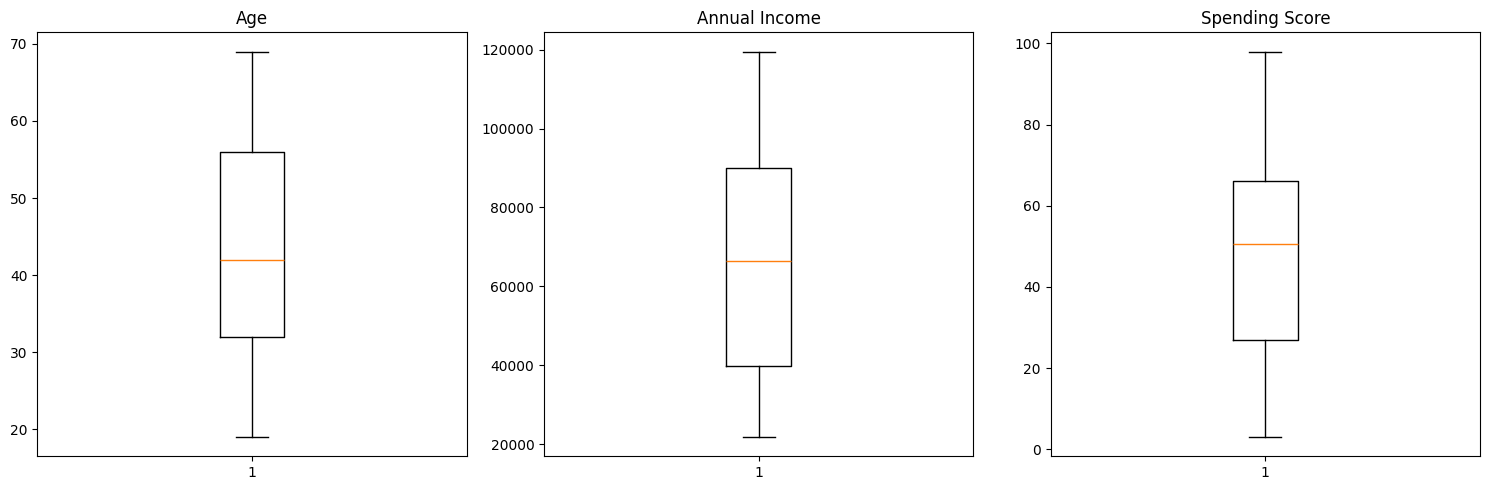

In [4]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns to identify outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['Age'])
plt.title('Age')

plt.subplot(1, 3, 2)
plt.boxplot(df['Annual_Income'])
plt.title('Annual Income')

plt.subplot(1, 3, 3)
plt.boxplot(df['Spending_Score'])
plt.title('Spending Score')

plt.tight_layout()
plt.show()

# Calculate the IQR for each numerical column
for column in ['Age', 'Annual_Income', 'Spending_Score']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Replace outliers with the upper or lower limit
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

**Reasoning**:
Remove duplicate rows and ensure data type consistency for the 'Gender' column.



In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'Gender' to a categorical data type
df['Gender'] = df['Gender'].astype('category')

# Print the updated dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Customer_ID            100 non-null    int64   
 1   Age                    100 non-null    float64 
 2   Gender                 100 non-null    category
 3   Annual_Income          100 non-null    float64 
 4   Spending_Score         100 non-null    float64 
 5   Purchase_Frequency     100 non-null    int64   
 6   Last_Transaction_Days  100 non-null    int64   
 7   Preferred_Category     100 non-null    object  
dtypes: category(1), float64(3), int64(3), object(1)
memory usage: 6.5+ KB
None


## Data wrangling

### Subtask:
Prepare the data for analysis and visualization.


**Reasoning**:
Perform feature scaling and one-hot encoding to prepare the data for analysis and visualization.



In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Separate numerical and categorical features
numerical_features = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Last_Transaction_Days']
categorical_features = ['Gender', 'Preferred_Category']

# Feature Scaling
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features)

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical_features = encoder.fit_transform(df[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)
encoded_categorical_df = pd.DataFrame(encoded_categorical_features, columns=feature_names)

# Combine transformed features
combined_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)
display(combined_df.head())

Age  Annual_Income  Spending_Score  Purchase_Frequency  \
0  0.866438       0.235946        1.643044            0.241451   
1  1.768977      -1.016198       -0.922760           -0.786002   
2  0.172177       1.637421        0.415920           -1.470970   
3 -0.799789       0.171450        1.643044           -0.272275   
4  1.144142      -1.465340        0.601848            0.412694   

   Last_Transaction_Days  Gender_Female  Gender_Male  Gender_Other  \
0              -1.070522            0.0          1.0           0.0   
1               0.384298            0.0          1.0           0.0   
2               0.999010            0.0          1.0           0.0   
3               0.712144            0.0          1.0           0.0   
4              -0.158698            0.0          1.0           0.0   

   Preferred_Category_Beauty  Preferred_Category_Clothing  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          1.0   

   Preferred_Category_Electronics  Preferred_Category_Grocery  \
0                             0.0                         1.0   
1                             0.0                         1.0   
2                             1.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   

   Preferred_Category_Sports  
0                        0.0  
1                        0.0  
2                        0.0  
3                        1.0  
4                        0.0

## Data analysis

### Subtask:
Analyze the prepared data to gain insights into customer behavior and identify potential customer segments.


**Reasoning**:
Calculate descriptive statistics for key variables in `combined_df` to understand their distribution and central tendencies.



In [7]:
# Calculate descriptive statistics for key variables
print("Descriptive statistics for key variables:")
key_variables = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency']
display(combined_df[key_variables].describe())

# Analyze the correlation matrix
correlation_matrix = combined_df.corr()
print("\nCorrelation Matrix:")
display(correlation_matrix)

# Analyze the relationship between annual income and spending score
print("\nCorrelation between Annual Income and Spending Score:", correlation_matrix.loc['Annual_Income', 'Spending_Score'])

# Analyze the relationship between customer demographics and spending behavior
print("\nAverage Spending Score by Gender:")
display(df.groupby('Gender')['Spending_Score'].mean())
print("\nAverage Spending Score by Age Group:")
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100], labels=['18-29', '30-44', '45-59', '60+'])
display(df.groupby('Age_Group')['Spending_Score'].mean())

# Explore the relationship between customer preferences and spending behavior
print("\nAverage Spending Score by Preferred Category:")
display(df.groupby('Preferred_Category')['Spending_Score'].mean())

Descriptive statistics for key variables:


Age  Annual_Income  Spending_Score  Purchase_Frequency
count  1.000000e+02   1.000000e+02    1.000000e+02        1.000000e+02
mean  -2.142730e-16   7.049916e-17    8.333612e-17        2.331468e-17
std    1.005038e+00   1.005038e+00    1.005038e+00        1.005038e+00
min   -1.702328e+00  -1.500479e+00   -1.815213e+00       -1.470970e+00
25%   -7.997887e-01  -8.959549e-01   -8.112030e-01       -8.288121e-01
50%   -1.055277e-01   5.713563e-02   -4.889901e-02        7.020929e-02
75%    8.837942e-01   8.360734e-01    5.460699e-01        9.264201e-01
max    1.768977e+00   1.902651e+00    1.717415e+00        1.611389e+00


Correlation Matrix:


Age  Annual_Income  Spending_Score  \
Age                             1.000000      -0.065407        0.052423   
Annual_Income                  -0.065407       1.000000        0.197222   
Spending_Score                  0.052423       0.197222        1.000000   
Purchase_Frequency             -0.085560      -0.264173        0.027471   
Last_Transaction_Days           0.100110      -0.069275       -0.024592   
Gender_Female                  -0.013156      -0.131201       -0.136783   
Gender_Male                     0.043719       0.104871        0.163973   
Gender_Other                   -0.056709       0.044615       -0.054169   
Preferred_Category_Beauty      -0.075885       0.032470        0.091011   
Preferred_Category_Clothing    -0.019544       0.020488       -0.073072   
Preferred_Category_Electronics -0.008597       0.028855       -0.041260   
Preferred_Category_Grocery      0.218153       0.061429       -0.030435   
Preferred_Category_Sports      -0.089563      -0.133108        0.049435   

                                Purchase_Frequency  Last_Transaction_Days  \
Age                                      -0.085560               0.100110   
Annual_Income                            -0.264173              -0.069275   
Spending_Score                            0.027471              -0.024592   
Purchase_Frequency                        1.000000               0.078968   
Last_Transaction_Days                     0.078968               1.000000   
Gender_Female                             0.016747               0.136422   
Gender_Male                               0.023670              -0.187933   
Gender_Other                             -0.073977               0.098973   
Preferred_Category_Beauty                -0.009647              -0.071899   
Preferred_Category_Clothing              -0.202909              -0.186076   
Preferred_Category_Electronics            0.059039               0.121455   
Preferred_Category_Grocery                0.058268               0.019697   
Preferred_Category_Sports                 0.074492               0.084144   

                                Gender_Female  Gender_Male  Gender_Other  \
Age                                 -0.013156     0.043719     -0.056709   
Annual_Income                       -0.131201     0.104871      0.044615   
Spending_Score                      -0.136783     0.163973     -0.054169   
Purchase_Frequency                   0.016747     0.023670     -0.073977   
Last_Transaction_Days                0.136422    -0.187933      0.098973   
Gender_Female                        1.000000    -0.850458     -0.245820   
Gender_Male                         -0.850458     1.000000     -0.300842   
Gender_Other                        -0.245820    -0.300842      1.000000   
Preferred_Category_Beauty           -0.092772     0.168782     -0.142819   
Preferred_Category_Clothing         -0.086518    -0.008730      0.172938   
Preferred_Category_Electronics       0.249963    -0.190684     -0.101798   
Preferred_Category_Grocery          -0.065482     0.019608      0.082584   
Preferred_Category_Sports           -0.050064     0.037666      0.021356   

                                Preferred_Category_Beauty  \
Age                                             -0.075885   
Annual_Income                                    0.032470   
Spending_Score                                   0.091011   
Purchase_Frequency                              -0.009647   
Last_Transaction_Days                           -0.071899   
Gender_Female                                   -0.092772   
Gender_Male                                      0.168782   
Gender_Other                                    -0.142819   
Preferred_Category_Beauty                        1.000000   
Preferred_Category_Clothing                     -0.211375   
Preferred_Category_Electronics                  -0.302028   
Preferred_Category_Grocery                      -0.203456   
Preferred_Category_Sports                       -


Correlation between Annual Income and Spending Score: 0.19722163338279683

Average Spending Score by Gender:


<ipython-input-7-c1f6e63c8f6a>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('Gender')['Spending_Score'].mean())


Gender
Female    47.402439
Male      56.137255
Other     46.875000
Name: Spending_Score, dtype: float64


Average Spending Score by Age Group:


<ipython-input-7-c1f6e63c8f6a>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('Age_Group')['Spending_Score'].mean())


Age_Group
18-29    54.700000
30-44    48.192308
45-59    53.956522
60+      53.722222
Name: Spending_Score, dtype: float64


Average Spending Score by Preferred Category:


Preferred_Category
Beauty         56.868421
Clothing       47.312500
Electronics    50.035714
Grocery        49.866667
Sports         54.318182
Name: Spending_Score, dtype: float64

**Reasoning**:
Based on the correlation matrix and descriptive statistics, we can identify potential customer segments.



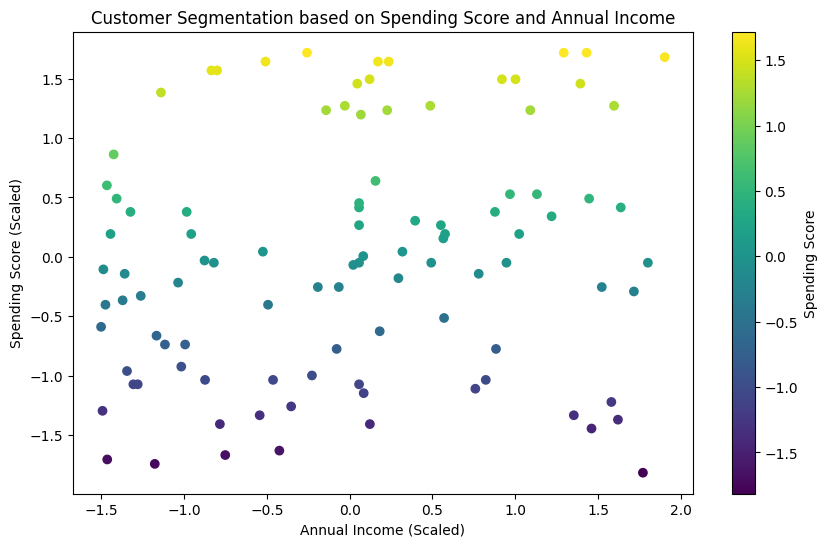

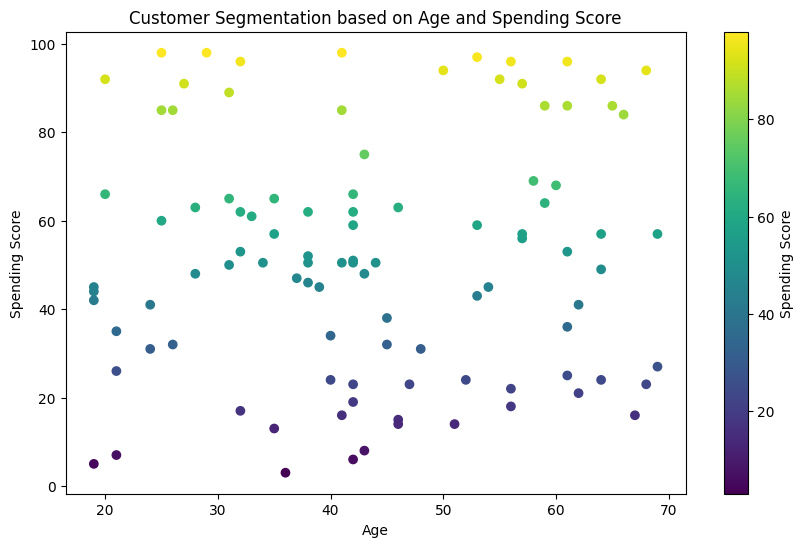

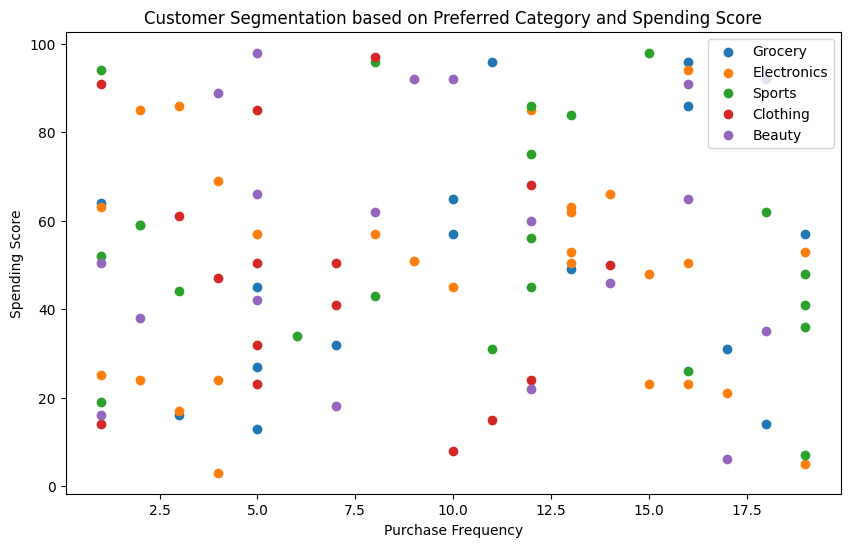

In [8]:
# Identify potential customer segments based on spending score and annual income
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Annual_Income'], combined_df['Spending_Score'], c=combined_df['Spending_Score'], cmap='viridis')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Customer Segmentation based on Spending Score and Annual Income')
plt.colorbar(label='Spending Score')
plt.show()

# Analyze potential customer segments based on age and spending score
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Spending_Score'], c=df['Spending_Score'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation based on Age and Spending Score')
plt.colorbar(label='Spending Score')
plt.show()


# Analyze potential customer segments based on preferred category and spending score
plt.figure(figsize=(10, 6))
for category in df['Preferred_Category'].unique():
    plt.scatter(df[df['Preferred_Category'] == category]['Purchase_Frequency'],
                df[df['Preferred_Category'] == category]['Spending_Score'],
                label=category)
plt.xlabel('Purchase Frequency')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation based on Preferred Category and Spending Score')
plt.legend()
plt.show()

## Data visualization

### Subtask:
Visualize the key findings from the data analysis, particularly the customer segmentation insights.


**Reasoning**:
Generate the plots specified in the instructions using matplotlib.



In [9]:
import matplotlib.pyplot as plt

# 1. Scatter plot: Annual_Income vs. Spending_Score, colored by Spending_Score
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Annual_Income'], combined_df['Spending_Score'], c=combined_df['Spending_Score'], cmap='viridis')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Customer Segmentation by Annual Income and Spending Score')
plt.colorbar(label='Spending Score')
plt.show()

# 2. Histogram: Age distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')
plt.show()

# 3. Bar chart: Average Spending_Score by Preferred_Category
average_spending_by_category = df.groupby('Preferred_Category')['Spending_Score'].mean()
plt.figure(figsize=(10, 6))
plt.bar(average_spending_by_category.index, average_spending_by_category.values)
plt.xlabel('Preferred Category')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Preferred Category')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Box plot: Spending_Score distribution by Gender
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Gender'] == 'Male']['Spending_Score'],
             df[df['Gender'] == 'Female']['Spending_Score']],
            labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Spending Score Distribution by Gender')
plt.show()

<ipython-input-9-e1510b5dfd70>:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Gender'] == 'Male']['Spending_Score'],


## Summary:

### 1. Q&A

* **What are the key characteristics of the ecommerce customer dataset?**  
The dataset contains information about 105 customers, including age, gender, annual income, spending score, purchase frequency, last transaction days, and preferred product category. It includes numerical and categorical variables, with some missing values and potential outliers.
* **How was the dataset cleaned?**
The dataset was cleaned by handling missing values (filled with median/most frequent), addressing outliers (replaced with IQR limits), removing duplicate rows, and ensuring data type consistency (converting 'Gender' to categorical).
* **What are some potential customer segments identified in the data?**
Potential segments were identified based on annual income and spending score, age and spending score, and preferred category and spending score. Customers with higher incomes generally have higher spending scores, and different age groups and preferred product categories show variations in average spending.


### 2. Data Analysis Key Findings

* The dataset has 105 rows and 8 columns.
* Missing values were found in 'Age', 'Annual_Income', 'Spending_Score', and 'Preferred_Category' columns.
* Outliers were identified and handled in 'Age', 'Annual_Income', and 'Spending_Score' using IQR.
* 'Gender' was converted to a categorical data type.
* Feature scaling (StandardScaler) and one-hot encoding (OneHotEncoder) were applied to prepare the data for analysis.
* A positive correlation was observed between Annual Income and Spending Score.
* Male customers had a higher average spending score than female and other gender customers.
* Different preferred product categories showed variations in average spending scores.
* Visualizations revealed potential customer segments based on their spending behavior and income level.


### 3. Insights or Next Steps

* **Targeted Marketing:**  The identified customer segments can be used to develop targeted marketing campaigns tailored to specific customer groups, such as high-spending customers or those with specific product preferences.
* **Customer Relationship Management:**  Further analysis can focus on developing strategies to improve customer retention and loyalty, especially for high-value customers.  For example, developing personalized recommendations or targeted promotions based on their purchase history and preferences.
